<a href="https://colab.research.google.com/github/chathushi/Autonomous-World-Mentoring/blob/main/DATA_6100_Project1_Final_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ames Housing Price Prediction
**Chathushi Thalpage | DATA6100 Project 1| University of Guelph**

This notebook predicts house prices using Linear Regression with feature engineering, outlier handling, and forward feature selection.

**Initial Data Loading & Exploration**

In [ ]:
# Initial Data Loading & Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler

# Mount Google Drive
drive.mount('/content/drive')

# Load training and test datasets
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing_Data_Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing_Data_Test.csv')

print("\nShape of training data:", train.shape)
print("Shape of test data:", test.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Shape of training data: (1000, 82)
Shape of test data: (446, 81)


In [ ]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1000 non-null   int64  
 1   Id             1000 non-null   int64  
 2   MSSubClass     1000 non-null   int64  
 3   MSZoning       1000 non-null   object 
 4   LotFrontage    814 non-null    float64
 5   LotArea        1000 non-null   int64  
 6   Street         1000 non-null   object 
 7   Alley          66 non-null     object 
 8   LotShape       1000 non-null   object 
 9   LandContour    1000 non-null   object 
 10  Utilities      1000 non-null   object 
 11  LotConfig      1000 non-null   object 
 12  LandSlope      1000 non-null   object 
 13  Neighborhood   1000 non-null   object 
 14  Condition1     1000 non-null   object 
 15  Condition2     1000 non-null   object 
 16  BldgType       1000 non-null   object 
 17  HouseStyle     1000 non-null   object 
 18  OverallQu

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1000.000000,1000.000000,1000.000000,814.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,994.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,499.500000,725.853000,58.165000,70.120393,10778.454000,6.088000,5.578000,1970.550000,1984.620000,100.989940,...,93.351000,46.471000,23.112000,2.898000,14.37500,2.735000,42.00000,6.307000,2007.832000,178403.271000
std,288.819436,422.179162,43.579318,25.730561,11647.964726,1.365328,1.108668,30.609908,20.682296,169.554306,...,125.172089,64.132598,62.992535,26.742827,55.44746,38.827985,521.97074,2.729139,1.332498,71476.841901
min,0.000000,1.000000,20.000000,21.000000,1477.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,1.000000,2006.000000,52500.000000
25%,249.750000,353.750000,20.000000,59.000000,7559.500000,5.000000,5.000000,1953.000000,1966.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,5.000000,2007.000000,128987.500000
50%,499.500000,732.500000,50.000000,70.000000,9544.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.00000,0.000000,0.00000,6.000000,2008.000000,162000.000000
75%,749.250000,1089.500000,70.000000,80.000000,11475.750000,7.000000,6.000000,2000.000000,2004.000000,167.500000,...,168.000000,70.000000,0.000000,0.000000,0.00000,0.000000,0.00000,8.000000,2009.000000,214000.000000
max,999.000000,1455.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1115.000000,...,857.000000,547.000000,552.000000,508.000000,480.00000,648.000000,15500.00000,12.000000,2010.000000,485000.000000


**Numerical and Categorical Data**

In [ ]:
numeric_cols = train.select_dtypes(include=["int64", "float64"])
num_numeric = numeric_cols.shape[1]

categorical_cols = train.select_dtypes(include=["object", "category"])
num_categorical = categorical_cols.shape[1]

num_numeric, num_categorical

print("Numeric columns:", list(numeric_cols.columns))
print("Categorical columns:", list(categorical_cols.columns))

Numeric columns: ['Unnamed: 0', 'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional'

**Identifying Missing Values**

In [ ]:
train.isnull().sum()

missing_cols = train.isnull().sum()[train.isnull().sum() > 0]
print(missing_cols)

LotFrontage     186
Alley           934
MasVnrType      596
MasVnrArea        6
BsmtQual         25
BsmtCond         25
BsmtExposure     26
BsmtFinType1     25
BsmtFinType2     26
Electrical        1
FireplaceQu     465
GarageType       61
GarageYrBlt      61
GarageFinish     61
GarageQual       61
GarageCond       61
PoolQC          995
Fence           815
MiscFeature     964
dtype: int64


**Histogram - Sales Prices**


Sale Price Statistics:
count      1000.000000
mean     178403.271000
std       71476.841901
min       52500.000000
25%      128987.500000
50%      162000.000000
75%      214000.000000
max      485000.000000
Name: SalePrice, dtype: float64


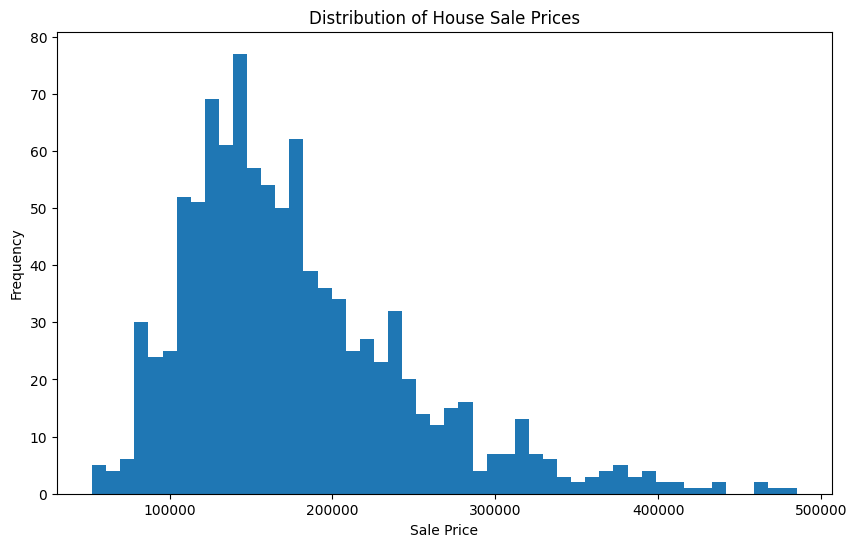

In [ ]:
# Check the target variable (SalePrice)
print("Sale Price Statistics:")
print(train['SalePrice'].describe())

# Visualize sale price distribution
plt.figure(figsize=(10, 6))
plt.hist(train['SalePrice'], bins=50)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Sale Prices')
plt.show()

According to the histogram, distribution of sale price is right-skewed (long tail to the right). Most houses are between $100k-$200k and there are few expensive houses go up past $400k.

**Data Preprocessing**

### Removing Unnecessary Columns

Unnamed: 0 and Id columns are dropped, because they are just index columns and don't provide predictive value for the price of houses.

In [ ]:
train_processed = train.copy()
test_processed = test.copy()

# Remove unnecessary columns
columns_to_drop = ['Unnamed: 0', 'Id']

train_processed = train.drop(columns=columns_to_drop)
test_processed = test.drop(columns=columns_to_drop)

print(f"Training data shape after dropping: {train_processed.shape}")
print(f"Test data shape after dropping: {test_processed.shape}")

Training data shape after dropping: (1000, 80)
Test data shape after dropping: (446, 79)


### Handling Missing Values

After analyzing the missing data I noticed that some missing values are meaningful. Many missing values actually mean the feature doesn't exist (e.g., no pool, no garage, no basement).

1. **Categorical "NA" features**: Fill with "None" because missing means the feature doesn't exist
2. **LotFrontage**: Fill with median because it has some outliers
3. **MasVnrArea**: Fill with 0 because no value means no masonry veneer
4. **GarageYrBlt**: Fill with 0 since missing means no garage
5. **Electrical**: Fill with mode since values are rarely missing

In [ ]:
categorical_na_cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish',
                       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType']


for col in categorical_na_cols:
   train_processed[col] = train_processed[col].fillna('None')
   test_processed[col] = test_processed[col].fillna('None')

print(f"Filled {len(categorical_na_cols)} categorical columns with 'None'")


median_lf = train_processed['LotFrontage'].median()
train_processed['LotFrontage'] = train_processed['LotFrontage'].fillna(median_lf)
test_processed['LotFrontage'] = test_processed['LotFrontage'].fillna(median_lf)
print(f"Filled LotFrontage with median: {median_lf:.2f} feet")


train_processed['MasVnrArea'] = train_processed['MasVnrArea'].fillna(0)
test_processed['MasVnrArea'] = test_processed['MasVnrArea'].fillna(0)
print("Filled MasVnrArea with 0")


train_processed['GarageYrBlt'] = train_processed['GarageYrBlt'].fillna(0)
test_processed['GarageYrBlt'] = test_processed['GarageYrBlt'].fillna(0)
print("Filled GarageYrBlt with 0")


if train_processed['Electrical'].isnull().sum() > 0:
   mode_elec = train_processed['Electrical'].mode()[0]
   train_processed['Electrical'] = train_processed['Electrical'].fillna(mode_elec)
   print(f"Filled Electrical with mode: {mode_elec}")


print(f"\nTraining missing values: {train_processed.isnull().sum().sum()}")
print(f"Test missing values: {test_processed.isnull().sum().sum()}")


Filled 15 categorical columns with 'None'
Filled LotFrontage with median: 70.00 feet
Filled MasVnrArea with 0
Filled GarageYrBlt with 0
Filled Electrical with mode: SBrkr

Training missing values: 0
Test missing values: 0


###Feature Engineering

This was done to create more meaningful features, because raw data doesn't have predictive power always. This makes the model more interpretable when new features are created which can be used for powerful prediction.



In [ ]:
# Age of the house is more predictive than year built
train_processed['HouseAge'] = train_processed['YrSold'] - train_processed['YearBuilt']
test_processed['HouseAge'] = test_processed['YrSold'] - test_processed['YearBuilt']

# Total bathrooms
train_processed['TotalBath'] = (train_processed['FullBath'] +
                                 0.5 * train_processed['HalfBath'] +
                                 train_processed['BsmtFullBath'] +
                                 0.5 * train_processed['BsmtHalfBath'])
test_processed['TotalBath'] = (test_processed['FullBath'] +
                                0.5 * test_processed['HalfBath'] +
                                test_processed['BsmtFullBath'] +
                                0.5 * test_processed['BsmtHalfBath'])


# Total square footage
train_processed['TotalSF'] = (train_processed['TotalBsmtSF'] +
                               train_processed['1stFlrSF'] +
                               train_processed['2ndFlrSF'])
test_processed['TotalSF'] = (test_processed['TotalBsmtSF'] +
                              test_processed['1stFlrSF'] +
                              test_processed['2ndFlrSF'])


# Years since remodel
train_processed['YearsSinceRemod'] = train_processed['YrSold'] - train_processed['YearRemodAdd']
test_processed['YearsSinceRemod'] = test_processed['YrSold'] - test_processed['YearRemodAdd']

print("\n Created new features: HouseAge, TotalBath, TotalSF, YearsSinceRemod")


 Created new features: HouseAge, TotalBath, TotalSF, YearsSinceRemod


### Handling Outliers in Features

In [ ]:
# numeric features in train
num_cols = [c for c in train_processed.select_dtypes(include=[np.number]).columns
            if c != "SalePrice"]

for col in num_cols:
    lower = train_processed[col].quantile(0.01)
    upper = train_processed[col].quantile(0.98)
    train_processed[col] = train_processed[col].clip(lower, upper)

    # clip test if column exists there
    if col in test_processed.columns:
        test_processed[col] = test_processed[col].clip(lower, upper)

print("Clipped numeric feature outliers at 1st/99th percentiles.")


Clipped numeric feature outliers at 1st/99th percentiles.



###Merge Rare Categories Under 'Other'

Columns such as Neighborhood, Exterior1st and Exterior2nd had many categories, some appearing only once or twice. These rare categories were grouped under "Other" to prevent the model from overfitting to uncommon labels and to reduce the number of unnecessary columns created during one-hot encoding.



In [ ]:
def merge_rare(df, col, min_count=10):
    vc = train_processed[col].value_counts()
    rare_vals = vc[vc < min_count].index
    df[col] = df[col].where(~df[col].isin(rare_vals), other='Other')

cat_cols = train_processed.select_dtypes(include='object').columns
for c in cat_cols:
    merge_rare(train_processed, c, min_count=10)
    if c in test_processed.columns:
        merge_rare(test_processed, c, min_count=10)


###Data Encoding



In [ ]:
# Define a mapping for quality/condition features
quality_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'None': 0}

ordinal_cols = [
    "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
    "HeatingQC", "KitchenQual", "FireplaceQu",
    "GarageQual", "GarageCond", "PoolQC"
]

for col in ordinal_cols:
    if col in train_processed.columns:
        train_processed[col] = train_processed[col].map(quality_map)
    if col in test_processed.columns:
        test_processed[col] = test_processed[col].map(quality_map)

print("Converted quality related features to ordinal")

Converted quality related features to ordinal


In [ ]:
# Get remaining categorical columns
categorical_cols = train_processed.select_dtypes(include=['object']).columns.tolist()

# Treat MSSubClass, MoSold, YrSold as categorical
categorical_as_numeric = ['MSSubClass', 'MoSold', 'YrSold']
for col in categorical_as_numeric:
    train_processed[col] = train_processed[col].astype(str)
    test_processed[col] = test_processed[col].astype(str)
    if col not in categorical_cols:
        categorical_cols.append(col)

print(f"Converting {len(categorical_cols)} categorical columns")


Converting 36 categorical columns


In [ ]:
# Applying one hot encoding
train_encoded = pd.get_dummies(train_processed, columns=categorical_cols, drop_first=True)
test_encoded = pd.get_dummies(test_processed, columns=categorical_cols, drop_first=True)

missing_cols = set(train_encoded.columns) - set(test_encoded.columns)
for col in missing_cols:
    if col != 'SalePrice':
        test_encoded[col] = 0

extra_cols = set(test_encoded.columns) - set(train_encoded.columns)
test_encoded = test_encoded.drop(columns=list(extra_cols))

test_encoded = test_encoded[train_encoded.drop('SalePrice', axis=1).columns]

print(f"Final Training shape: {train_encoded.shape}")
print(f"Final Test shape: {test_encoded.shape}")
print(f"Total features: {train_encoded.shape[1] - 1}")

Final Training shape: (1000, 213)
Final Test shape: (446, 212)
Total features: 212


###Train / Validation Split

To evaluate model performance during development, I split the 1000 house training set into:
- **Training subset**: 800 houses (80%) - used to train models
- **Validation subset**: 200 houses (20%) - used to test model performance

This split is necessary because the original test set doesn't include sale prices.
I used random_state=42 to ensure same data split every time.

In [ ]:
y_train = train_encoded['SalePrice']
X_train = train_encoded.drop('SalePrice', axis=1)
X_test = test_encoded.copy()

# Split training data into train and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train,
    test_size=0.2,      # 20% for validation
    random_state=42
)

print("Train shape:", X_train_split.shape)
print("Validation shape:", X_val_split.shape)
print("Test shape:", X_test.shape)

Train shape: (800, 212)
Validation shape: (200, 212)
Test shape: (446, 212)



###Pre Selecting Top Correlated Features with Sale Price



In [ ]:
# Compute Pearson correlation between each feature and SalePrice
correlations = {}
for col in X_train_split.columns:
    try:
        corr = np.corrcoef(X_train_split[col], y_train_split)[0, 1]
        if not np.isnan(corr):
            correlations[col] = abs(corr)
    except Exception:
        pass  # skip problematic columns

# Sort correlations in descending order
sorted_corr = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

# Pick top 100 features
top_100_features = [col for col, _ in sorted_corr[:100]]

# Display
print("Top 100 features most correlated with SalePrice:")
for i, (col, corr) in enumerate(sorted_corr[:100], start=1):
    print(f"{i:2d}. {col:25s} | correlation = {corr:.3f}")

# Create reduced datasets
X_train_split_reduced = X_train_split[top_100_features]
X_val_split_reduced   = X_val_split[top_100_features]
X_train_reduced       = X_train[top_100_features]
X_test_reduced        = X_test[top_100_features]



Top 100 features most correlated with SalePrice:
 1. TotalSF                   | correlation = 0.820
 2. OverallQual               | correlation = 0.796
 3. GrLivArea                 | correlation = 0.704
 4. ExterQual                 | correlation = 0.690
 5. KitchenQual               | correlation = 0.679
 6. GarageCars                | correlation = 0.670
 7. GarageArea                | correlation = 0.655
 8. TotalBsmtSF               | correlation = 0.625
 9. 1stFlrSF                  | correlation = 0.621
10. TotalBath                 | correlation = 0.611
11. BsmtQual                  | correlation = 0.607
12. HouseAge                  | correlation = 0.555
13. YearBuilt                 | correlation = 0.550
14. FullBath                  | correlation = 0.541
15. FireplaceQu               | correlation = 0.526
16. YearsSinceRemod           | correlation = 0.522
17. Foundation_PConc          | correlation = 0.519
18. YearRemodAdd              | correlation = 0.517
19. TotRmsAbvGr

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


### Best Subset Selection with Forward Selection

In [ ]:
def cv_rmse(X, y, feats, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    neg_mse = cross_val_score(LinearRegression(), X[feats], y,
                              scoring=make_scorer(mean_squared_error, greater_is_better=False),
                              cv=kf)
    return np.sqrt(-neg_mse).mean()

remaining = list(X_train_split_reduced.columns)
selected, rmse_valid_path, rmse_train_path = [], [], []
best_cv = np.inf

while remaining:
    scores = []
    for f in remaining:
        feats = selected + [f]
        model = LinearRegression().fit(X_train_split_reduced[feats], y_train_split)
        val_rmse = cv_rmse(X_train_split_reduced, y_train_split, feats, n_splits=5)
        train_rmse = np.sqrt(mean_squared_error(y_train_split, model.predict(X_train_split_reduced[feats])))
        scores.append((val_rmse, train_rmse, f))
    # pick best feature for this round
    scores.sort(key=lambda x: x[0])
    best_val, best_train, best_feat = scores[0]
    selected.append(best_feat)
    remaining.remove(best_feat)
    rmse_valid_path.append(best_val)
    rmse_train_path.append(best_train)
    print(f"Added {best_feat:25s} | Train RMSE: {best_train:8.2f} | CV RMSE: {best_val:8.2f}")

best_k = np.argmin(rmse_valid_path) + 1
best_features = selected[:best_k]
print("\nOptimal number of features:", best_k)
print("Best feature subset:", best_features)


Added TotalSF                   | Train RMSE: 40961.45 | CV RMSE: 40972.76
Added OverallQual               | Train RMSE: 33594.96 | CV RMSE: 33592.03
Added KitchenQual               | Train RMSE: 31729.68 | CV RMSE: 31793.63
Added BsmtUnfSF                 | Train RMSE: 30267.49 | CV RMSE: 30343.81
Added LotArea                   | Train RMSE: 29482.15 | CV RMSE: 29589.79
Added Neighborhood_NridgHt      | Train RMSE: 28682.55 | CV RMSE: 28846.94
Added SaleType_New              | Train RMSE: 28105.78 | CV RMSE: 28316.00
Added GarageCars                | Train RMSE: 27706.16 | CV RMSE: 27974.35
Added KitchenAbvGr              | Train RMSE: 27297.58 | CV RMSE: 27627.74
Added BsmtExposure_No           | Train RMSE: 26925.43 | CV RMSE: 27274.09
Added Neighborhood_NoRidge      | Train RMSE: 26435.63 | CV RMSE: 26961.35
Added SaleCondition_Normal      | Train RMSE: 26208.59 | CV RMSE: 26774.55
Added LotShape_IR2              | Train RMSE: 25990.24 | CV RMSE: 26583.89
Added Functional_Typ     

**Demonstration of Overfitting and Underfitting**



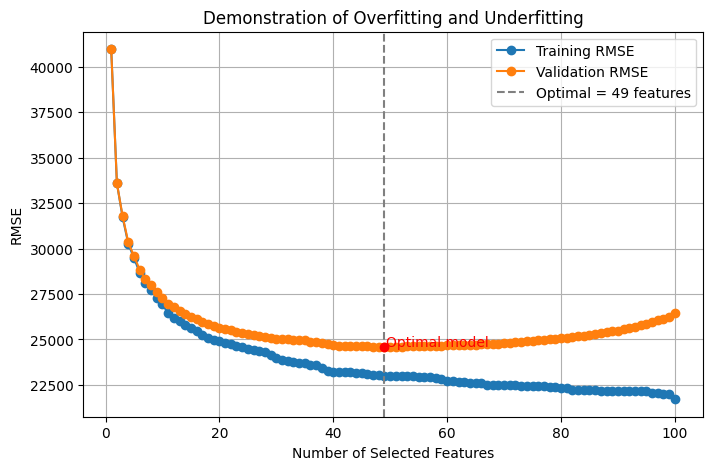

Optimal number of features: 49
Training RMSE at best k:  23004.78
Validation RMSE at best k: 24594.21


In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(rmse_train_path)+1), rmse_train_path, marker='o', label='Training RMSE')
plt.plot(range(1, len(rmse_valid_path)+1), rmse_valid_path, marker='o', label='Validation RMSE')

# highlight optimal point
plt.axvline(best_k, color='gray', linestyle='--', label=f'Optimal = {best_k} features')
plt.scatter(best_k, rmse_valid_path[best_k-1], color='red', zorder=5)
plt.text(best_k+0.3, rmse_valid_path[best_k-1]+0.3, 'Optimal model', color='red')

plt.title('Demonstration of Overfitting and Underfitting')
plt.xlabel('Number of Selected Features')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal number of features: {best_k}")
print(f"Training RMSE at best k:  {rmse_train_path[best_k-1]:.2f}")
print(f"Validation RMSE at best k: {rmse_valid_path[best_k-1]:.2f}")


Initially, both errors reduced as the model captured important patterns, however when too many variables were added, the model fit the training data better but performed worse on new data showing a clear sign of overfitting. This shows that simpler models can often make more reliable predictions and adding more features does not always improve performance.


**Evaluate Final Model with Full Training Data Set**

In [ ]:
# Combine training and validation splits for final model training
X_full_train = pd.concat([X_train_split_reduced, X_val_split_reduced])
y_full_train = pd.concat([y_train_split, y_val_split])

# Train the model again using only the selected features
final_model = LinearRegression()
final_model.fit(X_full_train[best_features], y_full_train)

print("Final model trained on full dataset using selected features.")

# Evaluate performance on full training data
y_full_pred = final_model.predict(X_full_train[best_features])
train_rmse_final = np.sqrt(mean_squared_error(y_full_train, y_full_pred))

print("\nPerformance on Training Data:")
print(f"  RMSE: ${train_rmse_final:,.2f}")

Final model trained on full dataset using selected features.

Performance on Training Data:
  RMSE: $23,859.07


In [ ]:
# Predict on test data
X_test_final = X_test_reduced[best_features]
y_test_pred = final_model.predict(X_test_final)

print("\nTest Predictions Summary:")
print(f"  Total predictions: {len(y_test_pred)}")
print(f"  Mean price:   ${y_test_pred.mean():,.2f}")
print(f"  Median price: ${np.median(y_test_pred):,.2f}")
print(f"  Min price:    ${y_test_pred.min():,.2f}")
print(f"  Max price:    ${y_test_pred.max():,.2f}")


Test Predictions Summary:
  Total predictions: 446
  Mean price:   $177,701.62
  Median price: $167,076.47
  Min price:    $36,747.66
  Max price:    $389,578.54


**Create Submission File for Gradescope**

In [ ]:
list_predictions = y_test_pred.tolist()
rounded_list_predictions = [int(x) for x in list_predictions]
print(rounded_list_predictions)
with open("calculator.py", "w") as f:
    f.write("def my_answer_list():\n")
    f.write("    return " + str(rounded_list_predictions) + "\n")

# Download for submission
from google.colab import files
files.download("calculator.py")

[181864, 133486, 110932, 156899, 106733, 253162, 36747, 196395, 144957, 142955, 127641, 296070, 259461, 168326, 162888, 388791, 109687, 193929, 208863, 79299, 106664, 180581, 166693, 198745, 116031, 130892, 186667, 193086, 187507, 113990, 116586, 166602, 319408, 222931, 156092, 183973, 72154, 147545, 224751, 218466, 154474, 166780, 201006, 160066, 137289, 103409, 117115, 229822, 281208, 161235, 270207, 160580, 99558, 221490, 177989, 182625, 105655, 170571, 146517, 122018, 116404, 144289, 144009, 124444, 208049, 218360, 187337, 213154, 279328, 92781, 207297, 241865, 104346, 232232, 167401, 203324, 119373, 195246, 103976, 153188, 124812, 185500, 235201, 238934, 110122, 228170, 263490, 119232, 266242, 174070, 182041, 187313, 325082, 154534, 173633, 87169, 147147, 202925, 133263, 64048, 213113, 117247, 276926, 145009, 103190, 125721, 209192, 131697, 270362, 341022, 208917, 199268, 77502, 134447, 106253, 129662, 143662, 218408, 264968, 295649, 258482, 230631, 318279, 154471, 97793, 193306, 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>